<a href="https://colab.research.google.com/github/cbicsabi/AIAIArt/blob/main/AIAIART_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to AIAIART!

In [ ]:
#@title Setup and Imports (run this first)
import torch 
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display as ipd

In [ ]:
#@title Lesson 1 Video
html = ipd.display(ipd.HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/p814BapRq2U" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'))
html

There's been a bit of an explosion of AI-generated art recently, with the advent of CLIP-guided text-to-image methods and a renewed interest in all things generative. Diving into the various communities, I quickly realised that although there are lots of folks using these methods, only a small subset feel confident enough with the code to modify the notebooks being shared around. This course aims to change that by equipping more coders and artists with the understanding and tools necessary to explore this space, creating new tools and getting to grips with existing ones. 

The idea had been brewing for some time, but when I put out this tweet expecting one or two responses and ended up with more engagement than I'd ever seen before it became obvious that this needs to happen asap :)


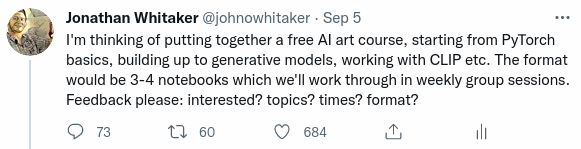

We'll be using Discord to run the course and keep everything organised. If you haven't already, do join us there (https://discord.gg/P92X2pxC) to stay up-to-date on all things course-related. These notebooks are designed to work as standalone lessons, but you'll get much more value out of them if you join us in our weekly sessions (Sundays 4pm UTC) to work through the material together. 

There will be four main lessons along with additional bonus notebooks. We'll start with Lesson #1 on September 19 and do one every week following that. The content for each lesson will hopefully be released at least a week before the live session. Links to the notebooks for each lesson will be included here as they become available:



*   Lesson #1 (This one!): Intro to PyTorch and Optimizing via Gradient Descent
*   Lesson #2: Learning Representations, ConvNets, Style Transfer and Auto-Encoders
*   Lesson #3: GANs and CLIP
*   Lesson #4: Going Further



# Navigating The Notebooks

![Navigating](https://c.tenor.com/CbhnRg0n7ksAAAAM/kermit-the-frog-looking-for-directions.gif)

We're cramming a lot into each lesson, but don't despair! A lot of the code will be illustrative examples which you can skim now and refer to later if you ever need to remind yourself about some specific function. Our goal is NOT to memorize everything, merely to get a high-level overview. I recommend collapsing sections as we complete them to make navigation easier, and if you get lost remember that you can see the table of contents in the panel on the left. 

Within each section there will be 
- Text explanations with code examples
- Short videos covering the core ideas (coming soon) For now I'm recording the lessons (or re-recording if I forget) and putting them up as a single long video that you can open in a separate tab and follow along with.
- Coding exercises to practice what you've learnt
- Discussion questions to talk through as a group, marked with **THINK/DISCUSS**

This is version one of this course, so there may be mistakes or concepts that are unclear. Please ask questions and share any feedback via Discord or directly during the live lessons.

The live lessons will be recorded (if participants are OK with that), so if you're working through this after we run the lesson there will be a video you can work along with linked here. 

At the start of each notebook, we'll have a setup section that imports some libraries that will give us access to functionality beyond that offered by Python's standard library. If you haven't already run it, scroll up to the start of this notebook and run the cell so that you're ready to view the videos and dive into the code. You'll notice the code is hidden - click 'show code' to see what's going on. Throughout these notebooks we'll hide code to keep things tidy, but you can always take a peek under the hood to see what's going on. 


# Section 1: PyTorch and Tensors

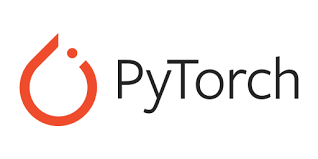

PyTorch is primarily a deep learning framework. It has been designed to make creating and working with deep neural networks as easy, fast and flexible as possible. Today we'll look at one of the core components that makes this possible: tensors. We'll start by looking at how to contruct and manipulate tensors, and then we'll explore the magic of autograd and how we can use it for optimization with gradient descent. 

Video:
- What is PyTorch?
- Creating tensors
- Modifying them
- Debugging tips
- Images as tensors

A lot of the material for this lessson was taken from the excellent content over at https://deeplearning.neuromatch.io/tutorials/W1D1_BasicsAndPytorch/student/W1D1_Tutorial1.html

## 1.1 Creating Tensors

![tensor lesson 1](https://i.imgflip.com/5moxki.jpg)

We can construct a tensor directly from some common python iterables, such as list and tuple. Nested iterables can also be handled as long as the dimensions make sense.

In [ ]:
# tensor from a list
a = torch.tensor([0, 1, 2])

#tensor from a tuple of tuples
b = ((1.0, 1.1), (1.2, 1.3))
b = torch.tensor(b)

# tensor from a numpy array
c = np.ones([2, 3])
c = torch.tensor(c)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")
print(f"Tensor c: {c}")

Tensor a: tensor([0, 1, 2])
Tensor b: tensor([[1.0000, 1.1000],
        [1.2000, 1.3000]])
Tensor c: tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


The numerical arguments we pass to these constructors determine the shape of the output tensor - try changing them and see what happens.

In [ ]:
x = torch.ones(5, 3)
y = torch.zeros(2)
z = torch.empty(1, 1, 5)
print(f"Tensor x: {x}")
print(f"Tensor y: {y}")
print(f"Tensor z: {z}")

Tensor x: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor y: tensor([0., 0.])
Tensor z: tensor([[[-1.4751e+03,  3.0949e-41,  3.3631e-44,  0.0000e+00,         nan]]])


Notice that `.empty()` does not return zeros, but seemingly random small numbers. Unlike `.zeros()`, which initialises the elements of the tensor with zeros, `.empty()` just allocates the memory. It is hence a bit faster if you are looking to just create a tensor.

There are also constructors for random numbers:

In [ ]:
# uniform distribution
a = torch.rand(1, 3)

# normal distribution
b = torch.randn(3, 4)

print(f"Tensor a: {a}")
print(f"Tensor b: {b}")

Tensor a: tensor([[0.2544, 0.1067, 0.4414]])
Tensor b: tensor([[-1.0673, -0.0941,  3.2497, -0.6451],
        [-2.0019,  1.9299,  0.5363,  1.6420],
        [-0.3257, -2.0665, -0.9476,  0.9962]])


**THINK/DISCUSS**: What's the difference? If you're curious, use `plt.hist(torch.randn(100))` to view the distribution.

There are also constructors that allow us to construct a tensor according to the above constructors, but with dimensions equal to another tensor:

In [ ]:
c = torch.zeros_like(a)
d = torch.rand_like(c)
print(f"Tensor c: {c}")
print(f"Tensor d: {d}")

Tensor c: tensor([[0., 0., 0.]])
Tensor d: tensor([[0.6750, 0.8231, 0.2990]])


Finally,  `.arange()` and `.linspace()` behave how you would expect them to if you are familar with numpy.

In [ ]:
a = torch.arange(0, 10, step=1) # Equivalent to np.arange(0, 10, step=1)
b = torch.linspace(0, 5, steps=11) # np.linspace(0, 5, num=11)

print(f"Tensor a: {a}\n")
print(f"Tensor b: {b}\n")

Tensor a: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Tensor b: tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000, 3.0000, 3.5000, 4.0000,
        4.5000, 5.0000])



#### Coding Exercise 1: Creating Tensors
Below you will find some incomplete code. Fill in the missing code to construct the specified tensors.

We want the tensors:

*A*: 20 by 21 tensor consisting of ones

*B*: a tensor with elements equal to the elements of numpy array Z

*C*: a tensor with the same number of elements as A but with values ∼U(0,1)

*D*: a 1D tensor containing the even numbers between 4 and 40 inclusive.

In [ ]:
# The numpy array required for B
Z = np.vander([1, 2, 3], 4) 

# Fill in your solutions:
A = ...
B = ...
C = ...
D = ...

# Check your answers

Tip: use `.shape` to check the dimensions of a tensor. 

## 1.2 Tensor Operations

![tensor operations](https://thumbs.gfycat.com/ElementaryDimpledBeardedcollie-max-1mb.gif)

We can perform operations on tensors using methods under `torch.`. However, in PyTorch most common Python operators are overridden, so we can use those instead. The common standard arithmetic operators (+, -, \*, /, and **) have all been lifted to elementwise operations.

In [ ]:
x = torch.tensor([1, 2, 4, 8])
y = torch.tensor([1, 2, 3, 4])
print('Addition via torch.add:', torch.add(x, y))
print('Addition using "+":', x+y) # The same
print('Some other operations:')
x + y, x - y, x * y, x / y, x**y  # The ** operator is exponentiation

Addition via torch.add: tensor([ 2,  4,  7, 12])
Addition using "+": tensor([ 2,  4,  7, 12])
Some other operations:


(tensor([ 2,  4,  7, 12]),
 tensor([0, 0, 1, 4]),
 tensor([ 1,  4, 12, 32]),
 tensor([1.0000, 1.0000, 1.3333, 2.0000]),
 tensor([   1,    4,   64, 4096]))

**THINK/DISCUSS**: What does 'element-wise' mean? Inspect the outputs above and discuss.

Tensors also have many built-in methods such as `.mean()` or `.sum()` (see the full list here: https://pytorch.org/docs/stable/tensors.html). Whenever you're working with a multi-dimensional tensor, pay attention to the dimensions and think about what result you're aiming to achieve.

In [ ]:
x = torch.rand(3, 3)
print(x)
print("\n")
# sum() - note the axis is the axis you move across when summing
print(f"Sum of every element of x: {x.sum()}")
print(f"Sum of the columns of x: {x.sum(axis=0)}")
print(f"Sum of the rows of x: {x.sum(axis=1)}")
print("\n")

tensor([[0.2500, 0.0619, 0.8785],
        [0.3432, 0.3221, 0.1314],
        [0.3996, 0.1663, 0.9374]])


Sum of every element of x: 3.4904942512512207
Sum of the columns of x: tensor([0.9928, 0.5503, 1.9473])
Sum of the rows of x: tensor([1.1904, 0.7968, 1.5033])




### Coding Exercise 2


1.   Display the mean of each column in x
2.   Make a new tensor `x_squared` which is x but every element has been raised to the power of 2
3.   Find the sum of all elements in `x_squared`



In [ ]:
# Your solution here

Remember we said most operations default to 'element-wise'? What if we want the matrix operation? Torch has you covered there as well. `torch.matmul()` or the `@` symbol let you do matrix multiplication. For dot multiplication, you can use torch.dot(). 

Transposes of 2D tensors are obtained using `torch.t()` or `Tensor.T`. Note the lack of brackets for `Tensor.T` - it is an attribute, not a method.



In [ ]:
# Exercise: create a few 2D tensors and try out some of these operations.

## 1.3 Manipulating Tensors

Beyond mathematical operations, we often want to access specific items or sets if items in a tensor, or perform operations like changing the shape of a tensor. Here are a few examples of some common tasks. These may feel simple if you're used to something like numpy, but it's worth making sure you know how to do these basic operations (or at least, you know where to find these examples again to refer to them!) since we'll use these a lot in the coming lessons. 

In [ ]:
# Indexing tensors
x = torch.arange(0, 10)
print(x)
print(x[-1])
print(x[1:3]) # From index 1 up to but NOT INCLUDING index 3
print(x[:-2])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor(9)
tensor([1, 2])
tensor([0, 1, 2, 3, 4, 5, 6, 7])


Reshaping works as long as the shapes make send. (3, 4) -> (4, 3) is fine, but (3, 4) -> (8, 2) won't work since there aren't enough elements!

In [ ]:
# Reshaping
z = torch.arange(12).reshape(6, 2)
print(f"Original z (6, 2) : \n {z}")

# 2D -> 1D
z = z.flatten()
print(f"Flattened z: \n {z}")

# and back to 2D
z = z.reshape(3, 4)
print(f"Reshaped (3x4) z: \n {z}")

Original z (6, 2) : 
 tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11]])
Flattened z: 
 tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
Reshaped (3x4) z: 
 tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


Concatenating tensors is done with torch.cat - take a look at this examples and take note of how the dimension specified affects the output:

In [ ]:
# Create two tensors of the same shape
x = torch.arange(12, dtype=torch.float32).reshape((3, 4))
y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])


#concatenate them along rows
cat_rows = torch.cat((x, y), dim=0)

# concatenate along columns
cat_cols = torch.cat((x, y), dim=1)

# printing outputs
print('Concatenated by rows: shape{} \n {}'.format(list(cat_rows.shape), cat_rows))
print('\n Concatenated by colums: shape{}  \n {}'.format(list(cat_cols.shape), cat_cols))

Concatenated by rows: shape[6, 4] 
 tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

 Concatenated by colums: shape[3, 8]  
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])


## 1.4 Squeezing Tensors

When processing batches of data, you will quite often be left with singleton dimensions. e.g. [1,10] or [256, 1, 3]. This dimension can quite easily mess up your matrix operations if you don’t plan on it being there…

In order to compress tensors along their singleton dimensions we can use the .`squeeze()` method. We can use the `.unsqueeze()` method to do the opposite.

In [ ]:
x = torch.randn(1, 10)
print(x.shape)
print(f"x[0]: {x[0]}") # printing the zeroth element of the tensor will not give us the first number!

torch.Size([1, 10])
x[0]: tensor([-0.2703, -1.2239, -0.8663, -0.2096,  0.7711,  2.7875, -0.0407, -2.8618,
        -0.6617,  0.6964])


We could do `x[0][0]` but this can get tedious - instead, we can use `squeeze` to get rid of that extra dimension:

In [ ]:
# lets get rid of that singleton dimension and see what happens now
x = x.squeeze(0)
print(x.shape)
print(f"x[0]: {x[0]}")

torch.Size([10])
x[0]: -0.27031052112579346


Adding singleton dimensions works a similar way, and is often used when tensors being added need same number of dimensions:

In [ ]:
y = torch.randn(5, 5)
print(f"shape of y: {y.shape}")

# lets insert a singleton dimension
y = y.unsqueeze(1) # Note the argument here is 1 - try 0 and 2 and make sure you get a feel for what unsqueeze does. 
print(f"shape of y: {y.shape}")

shape of y: torch.Size([5, 5])
shape of y: torch.Size([5, 1, 5])


### Coding Exercise 3



1.   Create a tensor shape (1, 10) containing the digits 5..14 
2.   Reshape to (2, 5)
3.   Use indexing to access just the first column in this reshaped tensor



In [ ]:
# Your solution here

## 1.5 Image Operations

As you can imagine, we'll be dealing with images a lot in this course. In this section we'll look at loading images, working with them and displaying them using the PIL library and converting back and forth between the format expected by PIL and that commonly used for tensor image processing.

First up, we need an image to play with. We'll grab one from a URL and open it using PIL aka the Pythin Imaging Library):

In [ ]:
# Downloading the original hastily-prepared course logo:
!curl https://raw.githubusercontent.com/johnowhitaker/aiaiart/master/logo.png > logo.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16325  100 16325    0     0  42292      0 --:--:-- --:--:-- --:--:-- 42292


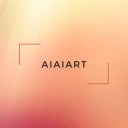

In [ ]:
fn = 'logo.png'
im = Image.open(fn)
im # PIL images are easy to view directly in Jupyter

We usually represent images as an array of pixels, each of which has a red, green and blue component (plus a transparency component in many cases). Let's convert our image to a numpy array and see how that data is organised:

In [ ]:
im_array = np.array(im)
print(im_array.shape) # width x height x channels (RGBA)

(128, 128, 4)


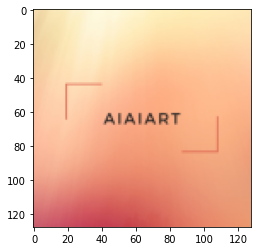

In [ ]:
plt.imshow(im_array) # We can also plot one, three or four-channel images with matplotlib

Converting to a tensor is easy since `torch.tensor` accepts numpy arrays as arguments:

In [ ]:
im_tensor = torch.tensor(im_array)
im_tensor.shape

torch.Size([128, 128, 4])

This image has a shape corresponding to width x height x channels. However, many pytorch image operations expect the order to be channels x width x height. Permute to the rescue:

In [ ]:
channels_first = im_tensor.permute(2, 0, 1)
channels_first.shape

torch.Size([4, 128, 128])

In this format we can access each channel individually:

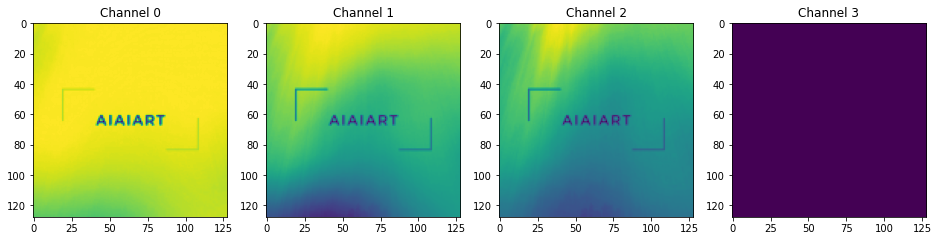

In [ ]:
# Plotting each channel individually:
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
for i in range(4):
  axs[i].imshow(channels_first[i])
  axs[i].set_title(f'Channel {i}')

One final thing to note: not only do many PyTorch image operations expect channels x width x height, they are also built around processing batches of images, so the final shape is batch_size x channels x width x height. When working with just one image we might need `.unsqueeze(0)` to create a batch of size 1.

### Coding Exercise 4: Image Operations


1.   Drop the alpha channelto turn channels_first into an RGB image, and then use unsqueeze to make the shape [1, 3, 128, 128]. Check this with `.shape`.
2.   Convert it back into the PIL/matplotlib format (w, h, c)
3.   Turn it back into a PIL Image (hint: Image.fromarray) and save it to a new file
4.   Use tensor indexing to 'crop' the center area of the image and display it
5.   See if you can swap some color channels around and visualize the result.



In [ ]:
# Your solutions here

# Section 2: Gradient Descent and Autograd

![skiing down a slope](https://media1.giphy.com/media/JrGH6KjBHJk38Y4nwm/giphy.gif)

Lets consider the following situation. Say we have:
- A function (could be a neural net, could be the equation for a straight line...) that takes some input(s) and produces some output(s) based on a set of parameters - let's call them `w`.
- Some measure of how well this function performs. Maybe this is how poorly the function describes some pattern in your data, or how well a network does in a classification task. Let's call this measure the `loss`, where the goal is to make this as small as possible.

The question is often 'how do we find a set of parameters that gives the best possible result?'. There are a few ways we could try to solve this. The most basic might be:
- Try all possible values for all parameters
- Randomly guess and keep the best

Clearly both of these have some major flaws, and when we're dealing with thousands or millions of parameters there is no way you could try all possible combinations. So, we need a smarter approach.



### 2.1 The Gradient Descent Algorithm

What if we could start from some set of parameters, and then see how to modify them slightly such that we get an improvement? Ideally, for each parameter we'd like to know what happens to the loss when we tweak that parameter slightly up or down. Formally, we'd like to know the **gradient of the loss with respect to that parameter**. You can think of the gradient as telling us which direction to move to get the biggest increase (or decrease if we go in the opposite direction).

IF we can find these gradients, then a sensible method for finding a good set of parameters to solve a given problem would be
1. Start with some random parameters
2. Find the gradient of the loss with respect to each parameter
3. Update each parameter such that you move some small amount in the direction of steepest descent
4. Go back to step 2, finding the gradients based on the new parameter values and repeat all this a bunch of times.

This is the gradient descent algorithm in a nutshell :) Let's do an example, where we'll create some data that roughtly follows a trend and try to approximate that trend with a straight line, which will be specified by two parameters. 

### 2.2 Creating an Example Problem

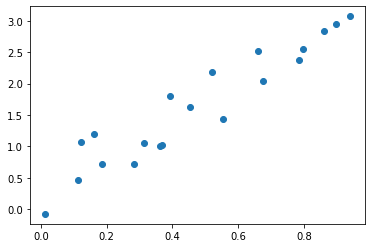

In [ ]:
# Creating some data:
x = torch.rand(20)
y = 3*x + 0.2 + torch.randn(20)*0.3 # y = ax + b + noise
plt.scatter(x, y) # It's always helpful to visualize what's going on wherever possible.

### 2.3 Defining our loss

We can describe a line as a function `y = ax + b` where a and b are our parameters. Take a look at the two lines shown here:

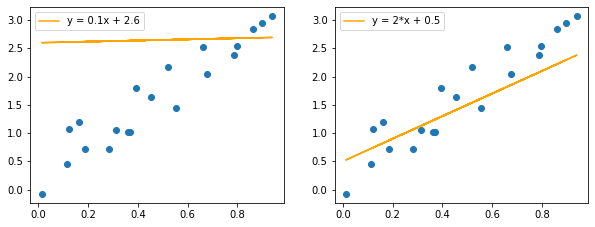

In [ ]:
#@title Comparing lines
fig, axs = plt.subplots(1, 2, figsize=(10, 3.6))
axs[0].scatter(x, y)
axs[0].plot(x, 0.1*x + 2.6, label='y = 0.1x + 2.6', c='orange')
axs[0].legend()
axs[1].scatter(x, y)
axs[1].plot(x, 2*x + 0.5, label='y = 2*x + 0.5',  c='orange')
axs[1].legend()

Clearly one does a better job than the other at describing the trend in this data. But how do we quantify this? There are several measures used in this sort of case, with a popular one being the 'Root Mean Squared Error'. It sounds intimidating, but all we do is take the errors (how far each point is from the line), square them, sum the squares and then take the square root of that. More points further from the line -> higher errors (squaring takes care of any minus signs that would otherwise cause issues with points above/below the line) -> a higher final value for the RMSE. So lower is better. This is our loss function. 

Here's one way to implement this in code (there are also built-in functions for this and many other ways you could write it):

In [ ]:
def rmse(y, y_hat):
  return torch.mean((y-y_hat)**2)**0.5 # See how many ways you can write this

Using this loss function, we can quantify how well those lines match the data:

In [ ]:
y_hat1 = 0.1*x + 2.6
y_hat2 = 2*x + 0.5
print('RMSE for y_hat1 = 0.1x + 2.6:', rmse(y, y_hat1))
print('RMSE for y_hat2 = 2*x + 0.5:', rmse(y, y_hat2))

RMSE for y_hat1 = 0.1x + 2.6: tensor(1.3288)
RMSE for y_hat2 = 2*x + 0.5: tensor(0.4359)


The second line has a lower loss, and is therefore a better fit. Here's an interactive widget where you can change both parameters and see the resulting line along with the loss:

In [ ]:
#@title Try out different values and see how good you can get:
import ipywidgets as widgets
slope = widgets.FloatSlider(min=0, max=5, value=1)
offset = widgets.FloatSlider(min=-1, max=1, value=1)


def get_rmse(slope, offset):
  y_hat = slope*x + offset
  print('RMSE:', rmse(y, y_hat))
  plt.scatter(x, y)
  plt.plot(x, y_hat, c='orange', label=f'y = {slope}*x + {offset}')
  plt.legend()


out = widgets.interactive_output(get_rmse, {'slope':slope, 'offset':offset})
display(slope, offset, out)

FloatSlider(value=1.0, max=5.0)

FloatSlider(value=1.0, max=1.0, min=-1.0)

Output()

**THINK/DISCUSS**: What is your thought process as you play with the sliders? Are you doing something like the gradient descent described earlier?

### 2.4 Calculating Gradients

So, how do we find the gradients we keep talking about? If you're good at differentiation, you can look at a function and figure them out analytically. But this quickly breaks down when the function is complex or involves many steps. Fortunately, PyTorch does something called automatic differentiation, where it can keep track of every operation that happens to a tensor. It builds something called a computational graph, and when you want to calculate the gradients with respect to some final result you can simply call `.backward()` and PyTorch will trace the path back through this graph filling in the gradients at each step. We won't go too deep into this, but here's a simple example:

In [ ]:
# Some operations to demonstrate autograd
a = torch.tensor(5.7)
a.requires_grad = True # This is important - by default PyTorch won't track gradients

b = 5*a + 2

c = torch.sin(2*b+0.1)

c

tensor(-0.9871, grad_fn=<SinBackward>)

Notice that `grad_fn` bit there? Because c depends on something (b) that depends on a tensor that requires_grad (a), PyTorch keeps track of the function needed to calculate the gradients. We could then see the gradient of c with respect to a with:

In [ ]:
c.backward() # Tell pytorch to propagate the gradients backwards down the chain of operations
a.grad # See the resulting gradient

tensor(-1.6036)

The derivative of c with respect to a is (10\*cos(10\*(a+0.41)) - plugging in a=5.7 we see that this does indeed give the answer dc/da = -1.603. This is quite magical - we can chain complex functions together and as long as eveything is differentiable we can rely on PyTorch to be able to work backwards and give us all the gradients we need.

### 2.5 Gradient Descent on our Toy Example

Let's get back to that example we were playing with, trying to find the parameters for a line that best describes the trend in our data. 

We create our parameters `w` (initialized to 2 random floats) and tell pytorch to keep track of gradients. 

Then, in a loop, we repeatedly find the loss, find the gradients (`loss.backward()`) and update the parameters accordingly. We could do this ourselves but PyTorch provides an optimizer that handles the update for us - torch.optim.SGD. The learning rate `lr` determines how small of a step we take at each iteration. 

Once the loop has finished running, we plot the losses and see that we are indeed getting better and better over time.

loss at step 0 : tensor(1.0797, grad_fn=<PowBackward0>)
loss at step 20 : tensor(0.5545, grad_fn=<PowBackward0>)
loss at step 40 : tensor(0.3964, grad_fn=<PowBackward0>)
loss at step 60 : tensor(0.3144, grad_fn=<PowBackward0>)
loss at step 80 : tensor(0.2911, grad_fn=<PowBackward0>)


Text(0.5, 1.0, 'Loss over time')

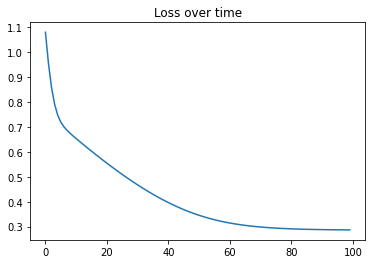

In [ ]:
w = torch.rand(2) # Our parameters
w.requires_grad = True # Explain

optimizer = torch.optim.SGD([w], lr=0.2) # What des SGD stand for?

losses = [] # Keep track of our losses (RMSE values)
ws = [] # Keep track of the values we predicted

for i in range(100):

  # Reset everything related to gradient calculations
  optimizer.zero_grad()

  # Get our outputs
  y_hat = w[0]*x + w[1] 

  # Calculate our loss
  loss = rmse(y, y_hat)

  # Store the loss for later
  losses.append(loss.detach().item())
  ws.append(w.clone().detach().numpy())

  # Print out updates ever few iterations
  if i % 20 == 0:
    print('loss at step', i, ':', loss)

  # Backpropagate the loss and use it to update the parameters
  loss.backward() # This does all the gradient calculations
  optimizer.step() # The optimizer does the update. 
  

plt.plot(losses)
plt.title('Loss over time')

In [ ]:
w # View the learned parameters

tensor([2.8944, 0.2629], requires_grad=True)

In [ ]:
w.grad # We can see the gradients of the loss with respect to w (now small since we're close to optimum)

tensor([-0.0184,  0.0093])

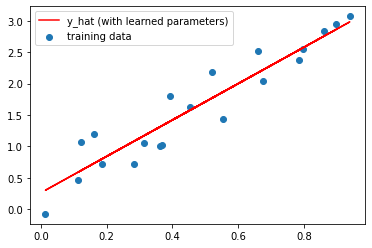

In [ ]:
# Plot predictions with these parameters
plt.scatter(x, y, label='training data')
y_hat = w[0]*x + w[1]
plt.plot(x, y_hat.detach(), c='red', label='y_hat (with learned parameters)')
plt.legend()

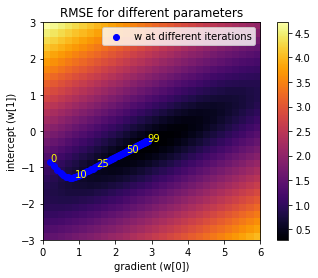

In [ ]:
#@title Show the loss landscape and our path through it:
w1, w2 = torch.meshgrid(torch.arange(0, 6, 0.2), torch.arange(-3, 3, 0.2)) # Grids with both parameters
width, height = w1.shape

# Calculating y_hat for each seat of params and then the resulting RMSEs
yhats = x.unsqueeze(0).expand(width*height, -1) * w1.flatten().unsqueeze(0).expand(20, -1).T + w2.flatten().unsqueeze(0).expand(20, -1).T
rmses = torch.mean((y.unsqueeze(0).expand(width*height, -1)-yhats)**2, dim=1)**0.5

# Showing the loss landscape
plt.imshow(rmses.reshape(width, height).T, cmap='inferno', extent=[0, 6, -3, 3])
plt.colorbar()
plt.title('RMSE for different parameters')
plt.xlabel('gradient (w[0])')
plt.ylabel('intercept (w[1])')

# Showing the path we took over time. We need x, -y due to the way imshow works 
plt.scatter([w[0] for w in ws], [-w[1] for w in ws], c='blue', label='w at different iterations')
for i in [0, 10, 25, 50, 99]:
  plt.annotate(i, (ws[i][0], -ws[i][1]), c='yellow')
plt.legend()
plt.show()

Instead of optimizer.step(), we could do `w -= w.grad * 0.2` where 0.2 is the learning rate and the minus sign is because we want to move in the direction that reduces loss (so opposite to the steepest gradient). 

**THINK/DISCUSS**: Does this make sense? Are there any issues? What happens when the gradients are small? What happens when our step size (learning rate) is too high? 

**THINK/DISCUSS**: What kinds of problems can we solve with this tool? Can you think of examples? What are the limitations?

# Section 3: Ethics - What are we optimizing for?

Choosing a loss function might seem like a fairly mundane and technical questions, but the choice of what we're optimizing for can have real-world impacts. What situations have you seen or experienced when the wrong target was picked?



# Conclusions

**THINK/DISCUSS** What have we just learnt?

Phew - that was quite a lot to cover! Congratulations on making it through. Some of today's content may have felt 'basic', some may seem completely confusing and beyond you. Don't worry - as we move forward in this course we'll keep building on this foundation but also repeating the important concepts again and again. You can always refer back here or ask questions in the Discord if something still hasn't clicked. 

# BONUS 1: Optimizing RGB Images with CLIP

What, you thought we were going to end today without making any pretty pictures? Think again!

We'll look at CLIP in more detail in future lessons, but for now here's a basic sumarry:

CLIP is a model built by OpenAI for connecting text an images. It was trained on a dataset consisting of images with captions. By mapping both image and text to a single space, it enables comparison between these different data modalities. Images that are similar to other images are close together in the representational space of CLIP, and so are images and text that are similar. You can read about it here: https://openai.com/blog/clip/

What this means for us is that we can use CLIP to compare an image that we generate with a text prompt. And since the entire pipeline is differentiable, we can then calculate the gradient of that loss and find out how to tweak our image to move it 'closer' to the text. In this example we'll start with random noise and optimize the raw pixel values - later in the course we'll explore some fancier ways of generating imagery.



### Setup for CLIP

In [ ]:
print("Downloading CLIP and installing requirements")
!git clone https://github.com/openai/CLIP                 &> /dev/null
!pip install -q  ftfy regex tqdm omegaconf pytorch-lightning &> /dev/null

### Usin CLIP as a loss function

We're going to load in a CLIP model and use it to encode both an image and some text:

In [ ]:
from CLIP import clip # The clip model
from torchvision import transforms # Some useful image transforms
import torch.nn.functional as F # Some extra methods we might need
from tqdm.notebook import tqdm # A progress bar library

# Load in one of the models from CLIP
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
perceptor = clip.load('ViT-B/32', jit=False)[0].eval().requires_grad_(False).to(device)
print(perceptor.visual.input_resolution) # 224px a side

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 68.0MiB/s]


224


Encoding text:

In [ ]:
# Embed some text
text_embed = perceptor.encode_text(clip.tokenize("A watercolor painting of the sunset over a mountain range").to(device)).float()
text_embed.shape

torch.Size([1, 512])

Encoding an image:

In [ ]:
# Create a random image
im = torch.rand(1, 3, 224, 224) # Does this work with different sizes?

# Create a transform - this will map the image data to the same range as that seen by CLIP during training
normalize = transforms.Normalize(mean=[0.48145466, 0.4578275, 0.40821073],std=[0.26862954, 0.26130258, 0.27577711])

# Embed the image
image_embed = perceptor.encode_image(normalize(im).to(device)).float()
image_embed.shape

torch.Size([1, 512])

Now that we have a representation of both the text and the image in the same 'space', we need some way to compare them. For this first test, let's re-use an idea from earlier and calculate a sort of Root-Mean-Squared-Difference:

In [ ]:
def clip_loss_basic(im, text_embed):
  image_embed = perceptor.encode_image(normalize(im).to(device)).float()
  loss = torch.mean((image_embed - text_embed)**2)**0.5 # Root Mean Squared Error
  return loss

clip_loss_basic(im, text_embed) # Some measure of how closely our image matches the text prompt (hopefully)

tensor(0.5092)

Now, compare our situation to the gradient descent example. We have some parameters to optimize (in this case, the raw pixel data of an image) and we have a way to measure loss (our `clip_loss_basic` function). Can we just use the same optimization loop as before? Let's try it and see!

  0%|          | 0/200 [00:00<?, ?it/s]

0 tensor(0.4940, grad_fn=<PowBackward0>)
50 tensor(0.2405, grad_fn=<PowBackward0>)
100 tensor(0.2219, grad_fn=<PowBackward0>)
150 tensor(0.1894, grad_fn=<PowBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


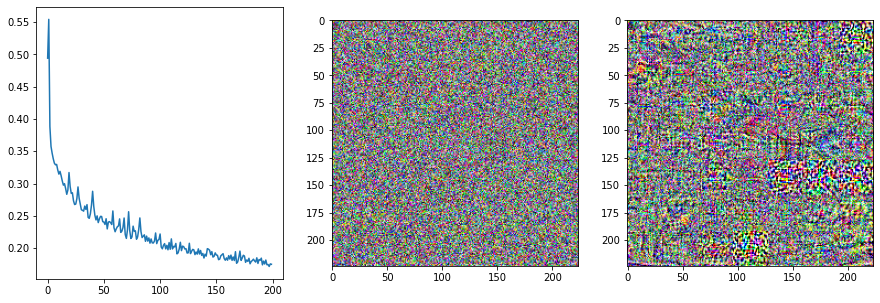

In [ ]:
# The target text
text_embed = perceptor.encode_text(clip.tokenize("A watercolor painting of the sunset over a mountain range").to(device)).float()

# The image we'll be optimizing
im = torch.rand(1, 3, 224, 224)
im.requires_grad = True

# Make a copy of the starting image
start_im = im.detach().clone()

# The optimizer
optimizer = torch.optim.SGD([im], lr=500) # Try a range of values (0.1, 1, 10, 100 ...). Discuss why a larger value than usual might make sense here.

losses = [] # Keep track of our losses (RMSE values)

for i in tqdm(range(200)):

  # Reset everything related to gradient calculations
  optimizer.zero_grad()

  # Calculate our loss
  loss = clip_loss_basic(im, text_embed)

  # Store the loss for later
  if i % 50 == 0:
    print(i, loss)
  losses.append(loss.detach().item())

  # Backpropagate the loss and use it to update the parameters
  loss.backward() # This does all the gradient calculations
  optimizer.step() # The optimizer does the update

# Visualize the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(losses)
axs[1].imshow(start_im.squeeze().permute(1, 2, 0))
axs[2].imshow(im.squeeze().detach().permute(1, 2, 0))

Hmm... that's not great! You can try different learning rates and fiddle with some other things, but there are a few big issues here. TO highlight one of them, let's look at what has changed by comparing our generated image to the starting image:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


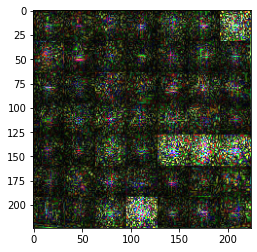

In [ ]:
plt.imshow(torch.abs(im.detach()-start_im).squeeze().permute(1, 2, 0)) # The absolute difference between the starting and ending images

Woah - what's going on here?

- `Clipping input data to the valid range for imshow with RGB data...` tells us that some values in our image are > 1, which is not ideal
- RMSE is not a great measure for comparing things high-dimensional spaces. Neither is a raw 'distace' calculation. 
- The CLIP model we're using here is absed on a Vision Trnasformer, which works with image patches. You can see the patches in the difference image above - since each patch is seeing the same pixels all the time, those pixels can go crazy getting just the right output for that patch.
- That learning rate might be a little high - you can try it lower or play with optmiizing for more iterations.

So, how do we fix all of this? Here's a few improvements we can make:

Improvements: 
- Changing our loss to something called the Great Circle Distance Squared
- Applying some transforms to the image before feeding it to CLIP, such that the model sees a slightly different version of the image each time
- Forcing the values to lie in the expected range for an image with `im.clip(0, 1)`.

We can also make it easier to tweak parameters by turning this block of code into a form with some inputs that we can play with. Click 'Show code' to see how it's done.

  0%|          | 0/200 [00:00<?, ?it/s]

0 tensor(0.9307, grad_fn=<MeanBackward0>)
50 tensor(0.7539, grad_fn=<MeanBackward0>)
100 tensor(0.7019, grad_fn=<MeanBackward0>)
150 tensor(0.6756, grad_fn=<MeanBackward0>)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


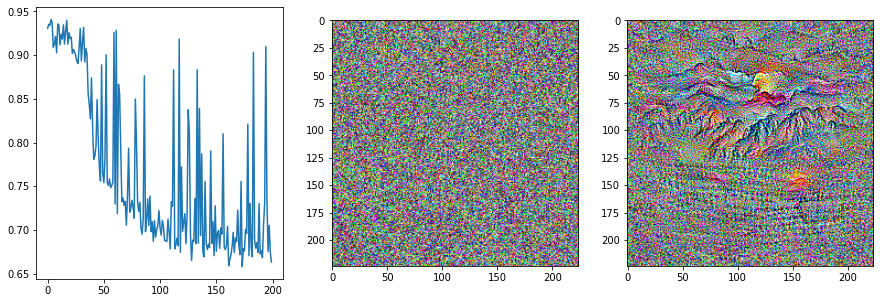

In [ ]:
#@title Take Two:

# Specifying some transforms to apply to our image:
tfms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomAffine(5),
    transforms.ColorJitter(),
    transforms.GaussianBlur(5),
])

# Our new and improved loss function
def clip_loss(im, text_embed):
  image_embed = perceptor.encode_image(tfms(im).to(device)).float()
  input_normed = F.normalize(image_embed.unsqueeze(1), dim=2)
  embed_normed = F.normalize(text_embed.unsqueeze(0), dim=2)
  dists = input_normed.sub(embed_normed).norm(dim=2).div(2).arcsin().pow(2).mul(2) # Squared Great Circle Distance
  return dists.mean()

# The target text as a parameter:
prompt = "A watercolor painting of the sunset over a mountain range" #@param
text_embed = perceptor.encode_text(clip.tokenize(prompt).to(device)).float()

# The image we'll be optimizing
im = torch.rand(1, 3, 224, 224)
im.requires_grad = True

# Make a copy of the starting image
start_im = im.detach().clone()

# The optimizer
learning_rate = 50 #@param
optimizer = torch.optim.SGD([im], lr=learning_rate)

losses = [] # Keep track of our losses (RMSE values)

n_iterations = 200 #@param
for i in tqdm(range(n_iterations)):

  # Reset everything related to gradient calculations
  optimizer.zero_grad()

  # Calculate our loss
  loss = clip_loss(im.clip(0, 1), text_embed) # note .clip(0, 1)

  # Store the loss for later
  if i % 50 == 0:
    print(i, loss)
  losses.append(loss.detach().item())

  # Backpropagate the loss and use it to update the parameters
  loss.backward() # This does all the gradient calculations
  optimizer.step() # The optimizer does the update

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(losses)
axs[1].imshow(start_im.squeeze().permute(1, 2, 0))
axs[2].imshow(im.squeeze().detach().permute(1, 2, 0))

Better! Our loss looks noisy thanks to different transforms being applied each iteration - this isn't a bad thing, but to smooth this out we could run a number of differently-transformed images through in a batch - and indeed this is what many implementations do. 

**THINK/DISCUSS**: Read the code - does it make sense? By playing with the parameters can you get something looking really nice?

### Further Improvements

You should now know enough to take a peek at my RGB optimization notebook: https://colab.research.google.com/drive/1MCC2IwAaRNCTBUzghuG41ypAkxjJvGtq?usp=sharing (There is also a user-friendly demo version here: https://colab.research.google.com/drive/1dBPXIspuMocqfcJqfjCn_PFeUfr36KGu?usp=sharing)

It builds on what we've seen here, but instead of just optimizing a large 224px image it creates a stack of images of different sizes which are combined into the final image. This results in much faster generation since a change to a pixel in one of the smaller images can affect a much larger area in the final image, so changes can happen more quickly. If you dig through that code you'll also see some different approaches to image augmentation/transformations, using multipe crops of the image to calcualte the loss and a nicer progress indicator that shows the image as it is being generated. 

Have fun and share what you make in the Discord!

# BONUS 2: Different Optimizers and Regularization

Gradient Descent (or Stochastic Gradient Descent, which is just GD on batches of data rather than the full dataset) is just one optimization method. There are many improvements that can be made. If you're interested, here is a great rundown of the many alternatives that are used today: https://ruder.io/optimizing-gradient-descent/

One useful idea that is bundled with optimizers in PyTorch is that of regularization. It's a large topic, but in essence regularization is concerned with smoothing things out and simplifying models or parameter sets by avoiding any values that are too extreme. This usually applies to deep networks where extreme values can cause issues, but even in our case here where we're working with pixel data it can help avoid cases where the pixel values are higher than they need to be. 

Let's try a different optimizer and introduce some regularization via the weight_decay parameter:



  0%|          | 0/100 [00:00<?, ?it/s]

0 0.9329796433448792
20 0.7253130674362183
40 0.7191541790962219
60 0.6796033382415771
80 0.7167770862579346


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


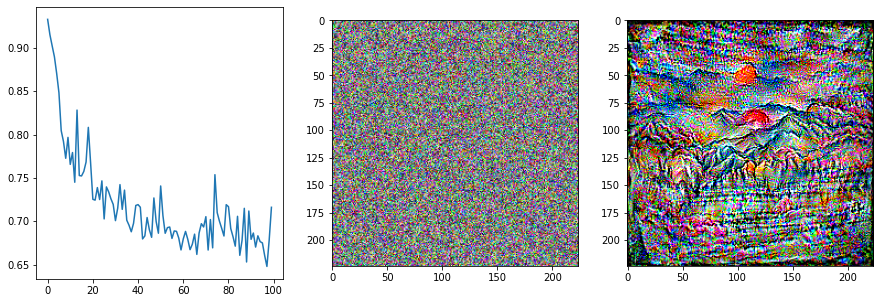

In [ ]:
# The image we'll be optimizing
im = torch.rand(1, 3, 224, 224)
im.requires_grad = True

# Make a copy of the starting image
start_im = im.detach().clone()

# The optimizer - feel free to try different ones here
optimizer = torch.optim.Adam([im], lr=0.05, weight_decay=1e-6)

losses = [] # Keep track of our losses (RMSE values)

for i in tqdm(range(100)):

  # Reset everything related to gradient calculations
  optimizer.zero_grad()

  # Calculate our loss across several different random crops
  loss = 0
  n_crops = 4
  for _ in range(n_crops):
    loss += clip_loss(im.clip(0, 1), text_embed)/n_crops

  # Store the loss for later
  if i % 20 == 0:
    print(i, loss.detach().item())
  losses.append(loss.detach().item())

  # Backpropagate the loss and use it to update the parameters
  loss.backward() # This does all the gradient calculations
  optimizer.step() # The optimizer does the update

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].plot(losses)
axs[1].imshow(start_im.squeeze().permute(1, 2, 0))
axs[2].imshow(im.squeeze().detach().permute(1, 2, 0))

The choice of optimizer and learning parameters can have a drastic effect on what your output looks like. Using a larger value for weight_decay might desaturate your image. Picking a learning rate that is too low or too high might result in very long training times or unstable results. The field of deep learning is vey emperical - although there are some bits of theory we can use to predict what will happen, the best approach in many cases is just to try different things and see what works!